In [ ]:
Решите с помощью команды odeint заданную систему дифференциальных уравнений с указанными начальными условиями. 
Визуализируйте найденное решение в форме: интегральных кривых x(t) и y(t); фазовой траектории на плоскости Oxy

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


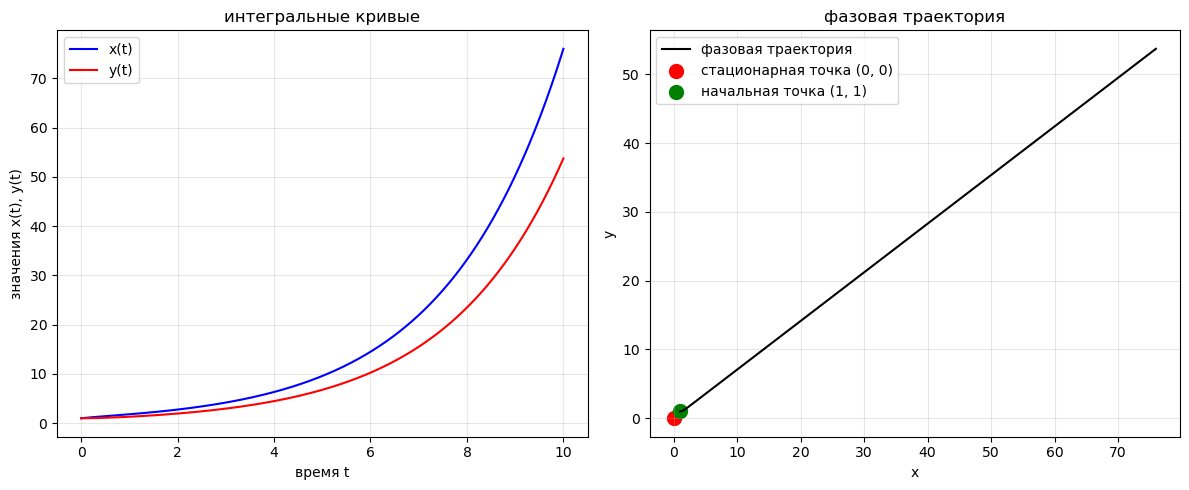

начальные значения: x(0) = 1.00, y(0) = 1.00
значения в t=10: x(10) ≈ 75.97, y(10) ≈ 53.72


In [18]:
 # x' = 2y - x
 # y' = x - y
def system(state, t):
    x, y = state
    dx_dt = 2*y - x  
    dy_dt = x - y   
    return [dx_dt, dy_dt]

x0, y0 = 1.0, 1.0  
t = np.linspace(0, 10, 1000)  

states = odeint(system, [x0, y0], t)
x = states[:, 0]  # x(t)
y = states[:, 1]  # y(t)

plt.figure(figsize=(12, 5))

# интегральные кривые 
plt.subplot(1, 2, 1)
plt.plot(t, x, 'b-', label='x(t)')
plt.plot(t, y, 'r-', label='y(t)')
plt.xlabel('время t')
plt.ylabel('значения x(t), y(t)')
plt.title('интегральные кривые')
plt.grid(True, alpha=0.3)
plt.legend()

# фазовая траектория
plt.subplot(1, 2, 2)
plt.plot(x, y, 'k-', label='фазовая траектория')
plt.scatter([0], [0], color='red', s=100, label='стационарная точка (0, 0)')
plt.scatter([x0], [y0], color='green', s=100, label='начальная точка (1, 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('фазовая траектория')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"начальные значения: x(0) = {x[0]:.2f}, y(0) = {y[0]:.2f}")
print(f"значения в t=10: x(10) ≈ {x[-1]:.2f}, y(10) ≈ {y[-1]:.2f}")

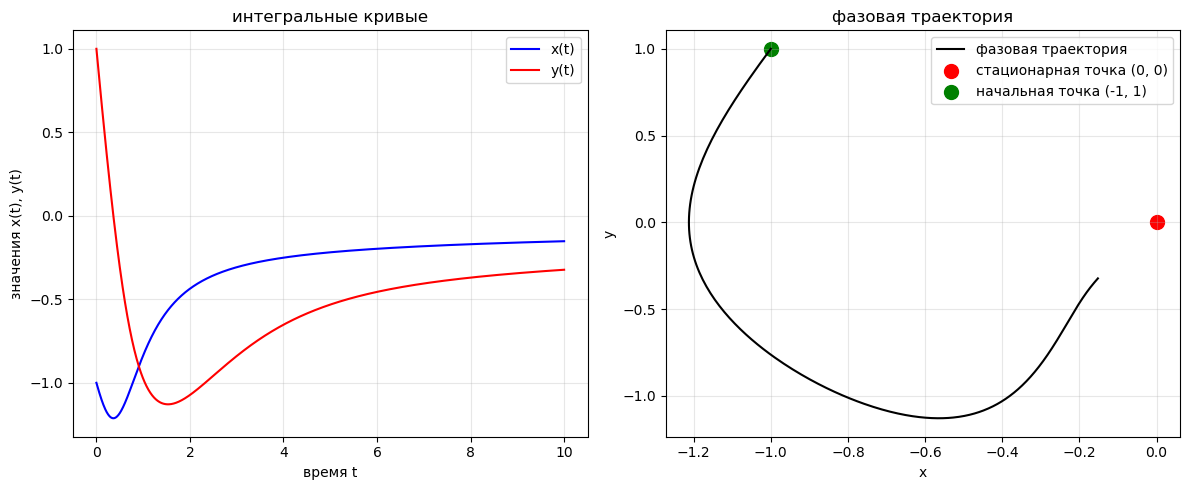

начальные значения: x(0) = -1.00, y(0) = 1.00
значения в t=10: x(10) ≈ -0.15, y(10) ≈ -0.32


In [20]:
# x' = -x^2 * y#
# y' = 2x - y
def system(state, t):
    x, y = state
    dx_dt = -x**2 * y  
    dy_dt = 2*x - y   
    return [dx_dt, dy_dt]

x0, y0 = -1.0, 1.0 
t = np.linspace(0, 10, 1000) 

states = odeint(system, [x0, y0], t)
x = states[:, 0]  
y = states[:, 1] 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, 'b-', label='x(t)')
plt.plot(t, y, 'r-', label='y(t)')
plt.xlabel('время t')
plt.ylabel('значения x(t), y(t)')
plt.title('интегральные кривые')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'k-', label='фазовая траектория')
plt.scatter([0], [0], color='red', s=100, label='стационарная точка (0, 0)')
plt.scatter([x0], [y0], color='green', s=100, label='начальная точка (-1, 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('фазовая траектория')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


print(f"начальные значения: x(0) = {x[0]:.2f}, y(0) = {y[0]:.2f}")
print(f"значения в t=10: x(10) ≈ {x[-1]:.2f}, y(10) ≈ {y[-1]:.2f}")

In [22]:
Постройте с помощью команды quiver поле направлений заданной системы дифференциальных уравнений

SyntaxError: invalid syntax (2557305554.py, line 1)

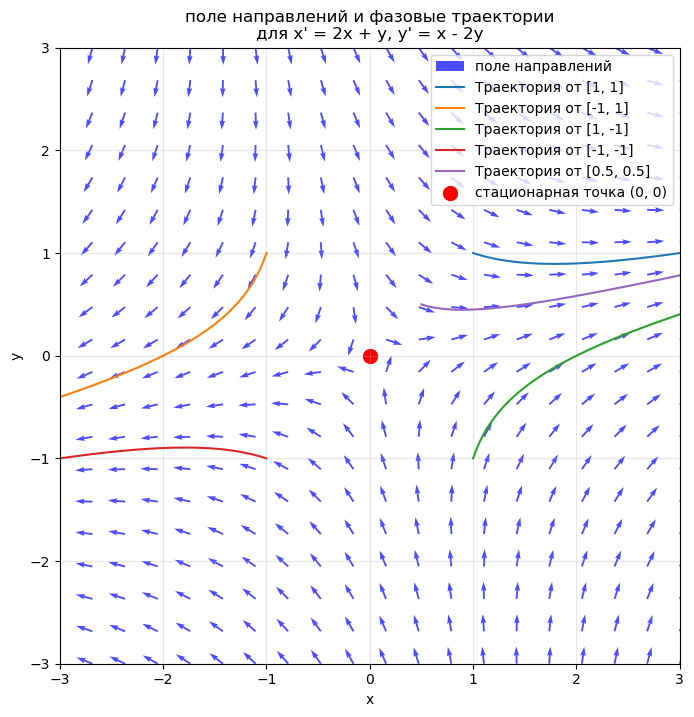

In [26]:
# x' = 2x + y
# y' = x - 2y
def system(state, t):
    x, y = state
    dx_dt = 2*x + y    
    dy_dt = x - 2*y    
    return [dx_dt, dy_dt]

# находим векторное поле
def system_quiver(x, y):
    dx_dt = 2*x + y
    dy_dt = x - 2*y
    return dx_dt, dy_dt

x_grid = np.linspace(-3, 3, 20)
y_grid = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x_grid, y_grid)
U, V = system_quiver(X, Y)

norm = np.sqrt(U**2 + V**2)# нормализация 
U = U / norm
V = V / norm
norm[norm == 0] = 1 # не делим на 0

t = np.linspace(0, 5, 1000)

# начальные условия для траекторий
initial_conditions = [[1, 1], [-1, 1], [1, -1], [-1, -1], [0.5, 0.5]]

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color='b', alpha=0.7, label='поле направлений')

# фазовые траектории
for ic in initial_conditions:
    states = odeint(system, ic, t)
    plt.plot(states[:, 0], states[:, 1], '-', label=f'Траектория от {ic}')

plt.scatter([0], [0], color='red', s=100, label='стационарная точка (0, 0)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('поле направлений и фазовые траектории\nдля x\' = 2x + y, y\' = x - 2y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

C:\Users\dimam\AppData\Local\Temp\ipykernel_9392\2834744020.py:34: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  states = odeint(system, ic, t)


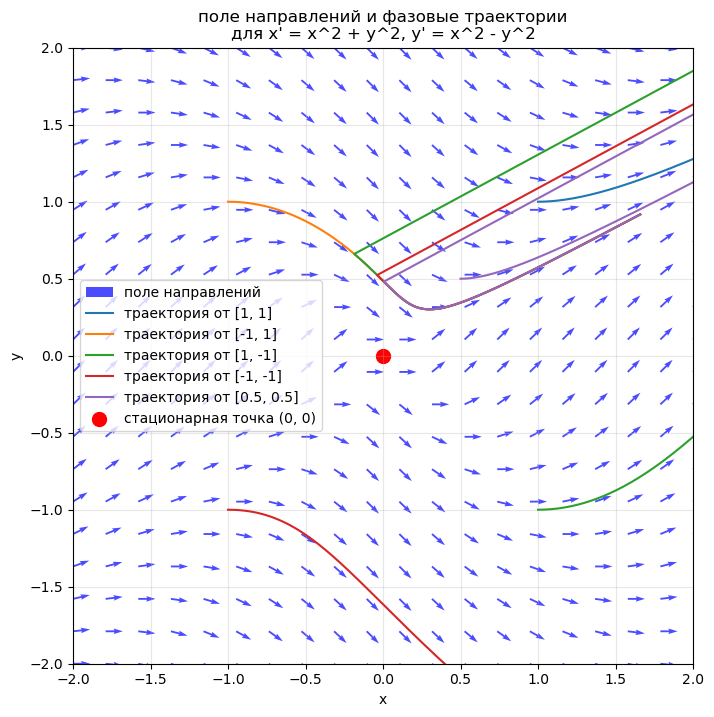

In [30]:
# x' = x^2 + y^2
# y' = x^2 - y^2
def system(state, t):
    x, y = state
    dx_dt = x**2 + y**2 
    dy_dt = x**2 - y**2  
    return [dx_dt, dy_dt]

def system_quiver(x, y):
    dx_dt = x**2 + y**2
    dy_dt = x**2 - y**2
    return dx_dt, dy_dt

#сетка
x_grid = np.linspace(-2, 2, 20)
y_grid = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_grid, y_grid)
U, V = system_quiver(X, Y)

norm = np.sqrt(U**2 + V**2)
norm[norm == 0] = 1  # не делим на 0
U = U / norm
V = V / norm

t = np.linspace(0, 5, 1000) 

initial_conditions = [[1, 1], [-1, 1], [1, -1], [-1, -1], [0.5, 0.5]]

plt.figure(figsize=(8, 8))

plt.quiver(X, Y, U, V, color='b', alpha=0.7, label='поле направлений')

for ic in initial_conditions:
    states = odeint(system, ic, t)
    plt.plot(states[:, 0], states[:, 1], '-', label=f'траектория от {ic}')

plt.scatter([0], [0], color='red', s=100, label='стационарная точка (0, 0)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('поле направлений и фазовые траектории\nдля x\' = x^2 + y^2, y\' = x^2 - y^2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

In [ ]:
Составьте и решите дифференциальное уравнение для нахождения фазовых траекторий заданной системы. 
Используя найденное решение, постройте с помощью команды contour фазовый портрет системы

C:\Users\dimam\AppData\Local\Temp\ipykernel_9392\1738740218.py:20: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=20, colors='k', linewidths=1.5, label='фазовые траектории')


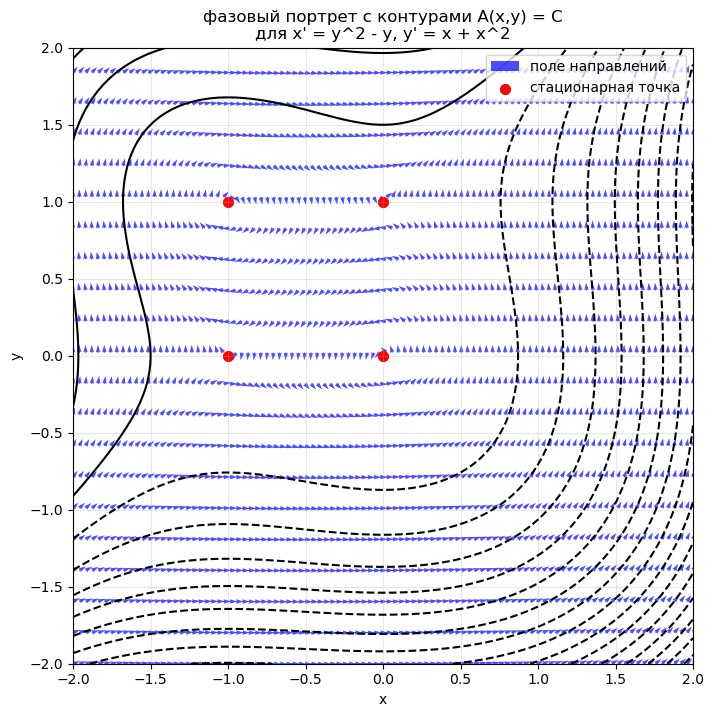

In [38]:
def A(x, y):
    return (y**3 / 3 - y**2 / 2) - (x**2 / 2 + x**3 / 3)

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = A(X, Y) 

# x' = y^2 - y
# y' = x + x^2
U = Y**2 - Y  
V = X + X**2  

norm = np.sqrt(U**2 + V**2)
norm[norm == 0] = 1 
U_norm = U / norm
V_norm = V / norm

plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, levels=20, colors='k', linewidths=1.5, label='фазовые траектории')
plt.quiver(X[::5], Y[::5], U_norm[::5], V_norm[::5], color='b', alpha=0.7, label='поле направлений')

# стационарные точки найденые аналитически: (0,0), (-1,0), (0,1), (-1,1)
stationary_points = [[0,0], [-1,0], [0,1], [-1,1]]
for px, py in stationary_points:
    plt.scatter(px, py, color='red', s=50, label='стационарная точка' if (px, py) == (0,0) else None)  

plt.xlabel('x')
plt.ylabel('y')
plt.title('фазовый портрет с контурами A(x,y) = C\nдля x\' = y^2 - y, y\' = x + x^2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

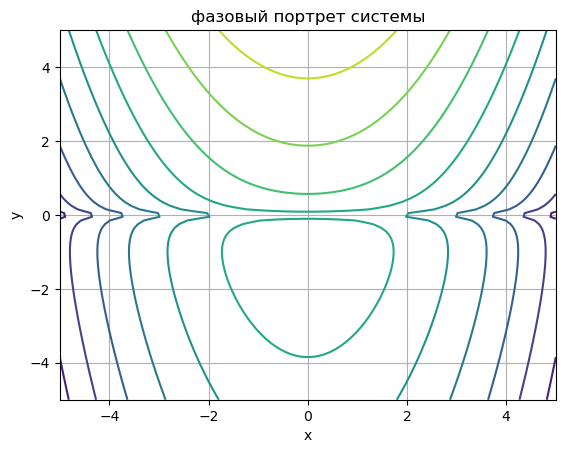

In [44]:
#из уравнения y + ln|y| - 0.5*x^2 = C
def my_function(x, y):
    if np.abs(y) < 0.0000001:#избежать ошибки с логарифмом, если y=0, заменяем маленькие y на что-то типа 0.0000001
        y = 0.0000001
    return y + np.log(np.abs(y)) - 0.5 * x * x  #функция для контуров

x = np.linspace(-5, 5, 100) 
y = np.linspace(-5, 5, 100)  
X, Y = np.meshgrid(x, y)  #делаем сетку чтобы посчитать функцию во всех точках

# считаем значения функции на всей сетке
Z = np.zeros((100, 100)) 
for i in range(100):
    for j in range(100):
        Z[i, j] = my_function(X[i, j], Y[i, j])  # прохордим по всему массиву в каждой точке

plt.figure()  
plt.contour(X, Y, Z, 10)  
plt.title("фазовый портрет системы")  
plt.xlabel("x") 
plt.ylabel("y")  
plt.grid(True)
plt.show()